In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
# normalizing the pixel values
x_train = x_train/255.0
x_test = x_test/255.0

In [4]:
# class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
# build the cnn model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [8]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 69s 42ms/step - loss: 1.5380 - accuracy: 0.4373 - val_loss: 1.2580 - val_accuracy: 0.5524
Epoch 2/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.1773 - accuracy: 0.5837 - val_loss: 1.2136 - val_accuracy: 0.5776
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0256 - accuracy: 0.6391 - val_loss: 1.0210 - val_accuracy: 0.6414
Epoch 4/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.9262 - accuracy: 0.6737 - val_loss: 0.9427 - val_accuracy: 0.6677
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8572 - accuracy: 0.6987 - val_loss: 0.9158 - val_accuracy: 0.6823
Epoch 6/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.7977 - accuracy: 0.7183 - val_loss: 0.8952 - val_accuracy: 0.6916
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7545 - accuracy: 0.7347 - val_loss: 0.9134 -

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 - 5s - loss: 0.8989 - accuracy: 0.6967 - 5s/epoch - 17ms/step

Test Accuracy: 0.6967


In [10]:
# classification report and cm

y_pred = np.argmax(model.predict(x_test), axis=1)
y_test_flat = y_test.flatten()

print("Classification Report:")
classification_report(y_test_flat, y_pred, target_names=class_names)

313/313 [==============================] - 6s 17ms/step
Classification Report:


'              precision    recall  f1-score   support\n\n    airplane       0.69      0.76      0.72      1000\n  automobile       0.89      0.78      0.83      1000\n        bird       0.52      0.68      0.59      1000\n         cat       0.58      0.41      0.48      1000\n        deer       0.65      0.66      0.65      1000\n         dog       0.71      0.47      0.56      1000\n        frog       0.74      0.81      0.77      1000\n       horse       0.77      0.76      0.76      1000\n        ship       0.73      0.83      0.78      1000\n       truck       0.73      0.82      0.78      1000\n\n    accuracy                           0.70     10000\n   macro avg       0.70      0.70      0.69     10000\nweighted avg       0.70      0.70      0.69     10000\n'

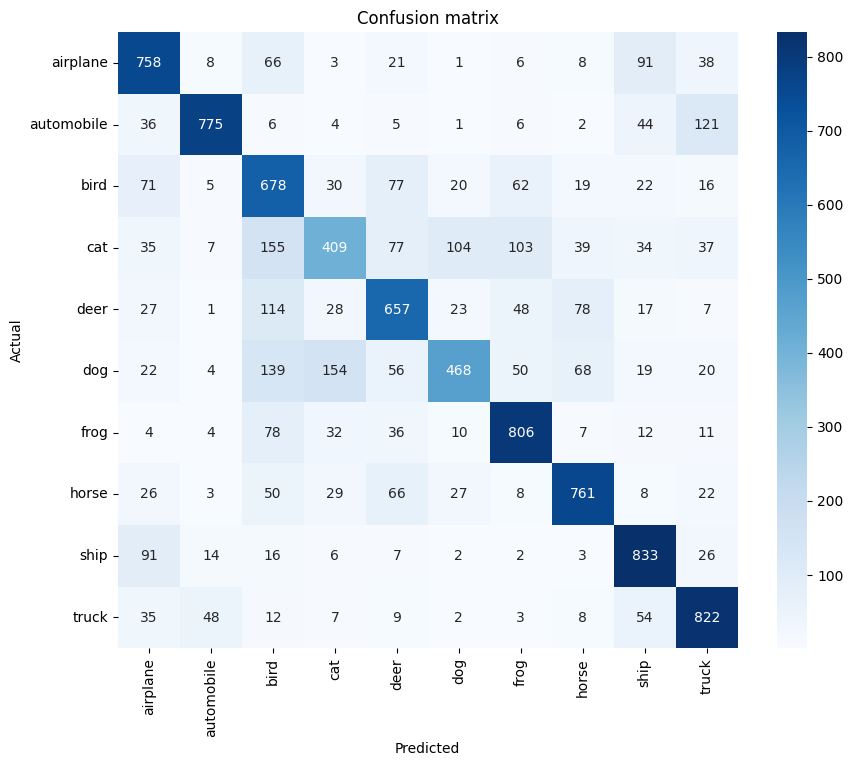

In [11]:
cm = confusion_matrix(y_test_flat, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()